<h1>Tugas Praktikum

<h3>Tugas 1: Multiple Linear Regression

### 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

1. Variabel Bebas (fitur)
- age
- sex
- children
- smoker
- region
2. Variabel Target
- charges

### 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Membaca dataset
data = pd.read_csv('dataset/insurance.csv')  # Gantilah 'nama_file.csv' dengan nama file dataset Anda

# Memisahkan kolom target (biaya medis personal)
X = data.drop(columns=['charges'])
y = data['charges']

# Melakukan pembagian data menjadi data latih dan data uji (80% data latih, 20% data uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data latih dan data uji
print("Jumlah data latih (train data):", len(X_train))
print("Jumlah data uji (test data):", len(X_test))


Jumlah data latih (train data): 1070
Jumlah data uji (test data): 268


In [28]:
data['sex'] = data['sex'].astype('category')
data['sex'] = data['sex'].cat.codes

data['smoker'] = data['smoker'].astype('category')
data['smoker'] = data['smoker'].cat.codes

data['region'] = data['region'].astype('category')
data['region'] = data['region'].cat.codes

data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [29]:
# menentukan variabel independen dan dependen
X = data.drop(columns = 'charges')
y = data['charges']
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [30]:
# Membagi data train dan data test dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 3. Lakukan feature scaling jika diperlukan.

In [31]:
# Feature Scaling
X = data.iloc[:, 0:5].values
y = data.iloc[:, 6].values
from sklearn.preprocessing import StandardScaler

# Standardize features (X) and target (y) separately
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1, 1))

### 4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
c = model.intercept_
print("Konstanta = ", c)

m = model.coef_
print("Koefisien Regresi = ", m)

Konstanta =  -10428.119803691547
Koefisien Regresi =  [ 2.59634761e+02 -5.43235302e-02  2.93390832e+02  4.67684029e+02
  2.40111697e+04 -4.99424941e+02]


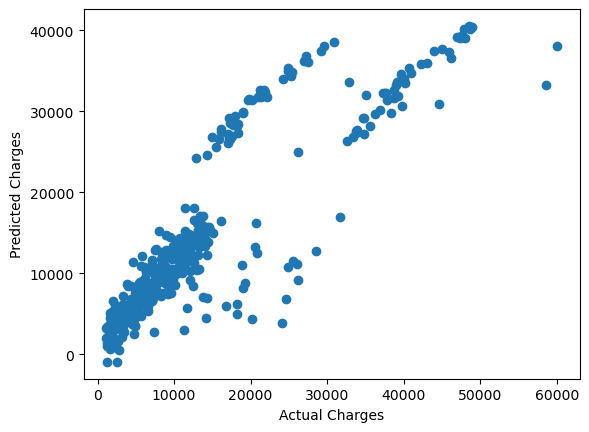

In [33]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

### 5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Hasil prediksi dan nilai target")
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()

Hasil prediksi dan nilai target


,Actual value,Predicted value
12,1826.84300,4137.795178
306,20177.67113,4346.994621
318,7421.19455,8607.174287
815,1877.92940,2995.801113
157,15518.18025,25642.535475


### 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [35]:
# Evaluasi model
regressor = LinearRegression()
regressor.fit(X, y)

# Make predictions
y_pred = regressor.predict(X)

# Calculate MAE
mae = mean_absolute_error(y, y_pred)

# Calculate MSE
mse = mean_squared_error(y, y_pred)

# Calculate R-squared
r2 = r2_score(y, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)

MAE: 0.34518699545780124
MSE: 0.25027749012908207
R-squared: 0.7497225098709179
